In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [3]:
def make3(init):
    return [init + 3*i for i in range(10)]

# 使用惠斯通电桥测量铜电阻

In [4]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	28.00	    572.60	    57.26	    
#1	31.00	    578.20	    57.82	    
#2	34.00	    584.50	    58.45	    
#3	37.00	    590.30	    59.03	    
#4	40.00	    596.50	    59.65	    
#5	43.00	    602.60	    60.26	    
#6	46.00	    608.70	    60.87	    
#7	49.00	    614.50	    61.45	    
#8	52.00	    620.20	    62.02	    
#9	55.00	    625.60	    62.56	    
---------------------------------------------------------------------------------------------------------------
R = 0.1984t + 51.702
R = 51.702 * (1 + 0.003838t)
不确定度 U_alpha = 10.3%


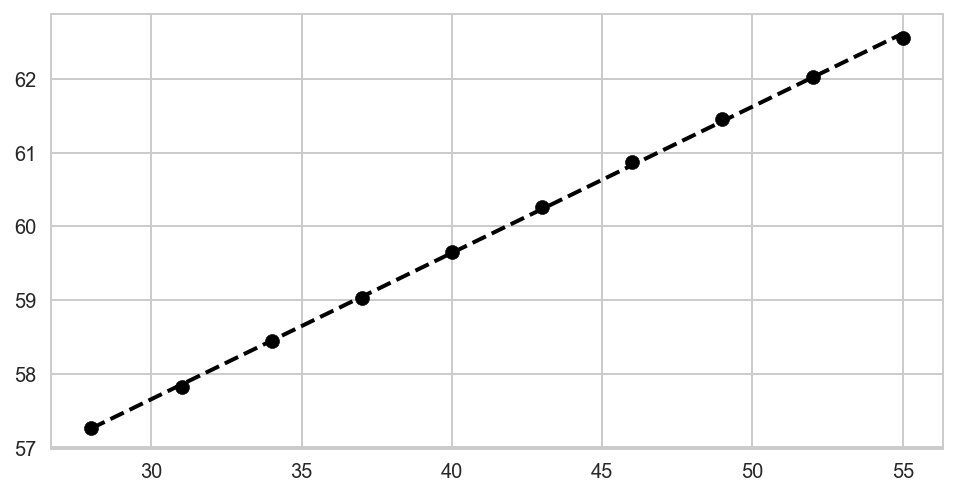

In [5]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : [572.6,578.2,584.5,590.3,596.5,602.6,608.7,614.5,620.2,625.6], 
    '_t_l'  : make3(28)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [6]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	36.30	    0.00	    0.00	    57.90	    
#1	39.30	    3.00	    0.53	    58.43	    
#2	42.30	    6.60	    1.18	    59.08	    
#3	45.30	    10.40	    1.85	    59.75	    
#4	48.30	    13.50	    2.41	    60.31	    
#5	51.30	    16.60	    2.96	    60.86	    
#6	54.30	    19.90	    3.55	    61.45	    
#7	57.30	    23.10	    4.12	    62.02	    
#8	60.30	    26.20	    4.67	    62.57	    
#9	63.30	    29.40	    5.24	    63.14	    
---------------------------------------------------------------------------------------------------------------
R = 0.1949t + 50.844
R = 50.844 * (1 + 0.003834t)
R_0 = 50.844, alpha = 0.003834
不确定度 U_alpha = 10.4%


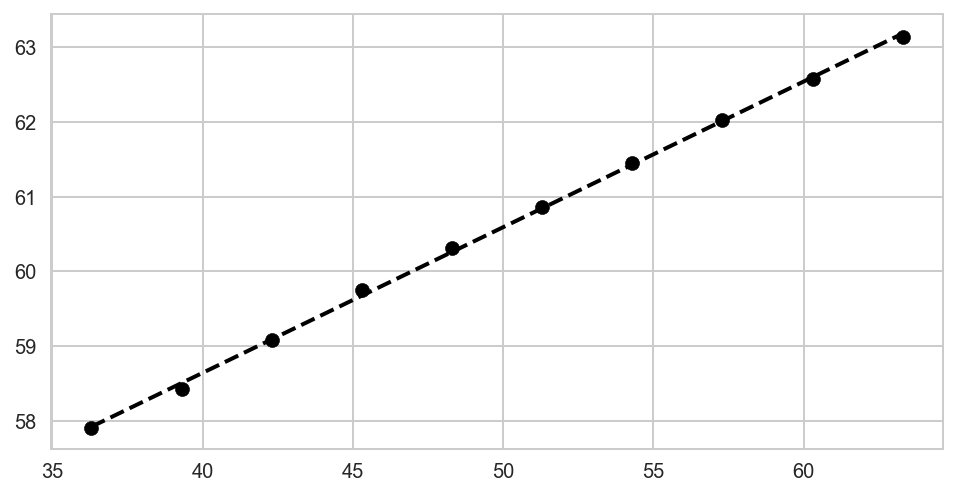

In [7]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 57.9,
    '_t_l' : make3(36.3),
    '_U_l' : [0,3.0,6.6,10.4,13.5,16.6,19.9,23.1,26.2,29.4]
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [8]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	42.20	    0.00	    0.00	    1550.00	    315.20	    7.3460	    0.003173	    
#1	45.20	    -8.10	    -153.82	    1396.18	    318.20	    7.2415	    0.003143	    
#2	48.20	    -16.70	    -288.57	    1261.43	    321.20	    7.1400	    0.003113	    
#3	51.20	    -25.80	    -407.03	    1142.97	    324.20	    7.0414	    0.003085	    
#4	54.20	    -35.60	    -513.52	    1036.48	    327.20	    6.9436	    0.003056	    
#5	57.20	    -46.10	    -609.07	    940.93	    330.20	    6.8469	    0.003028	    
#6	60.20	    -57.30	    -694.73	    855.27	    333.20	    6.7514	    0.003001	    
#7	63.20	    -69.20	    -771.55	    778.45	    336.20	    6.6573	    0.002974	    
#8	66.20	    -81.70	    -839.97	    710.03	    339.20	    6.5653	    0.002948	    
#9	69.20	    -95.00	    -901.96	    648.04	    342.20	    6.47

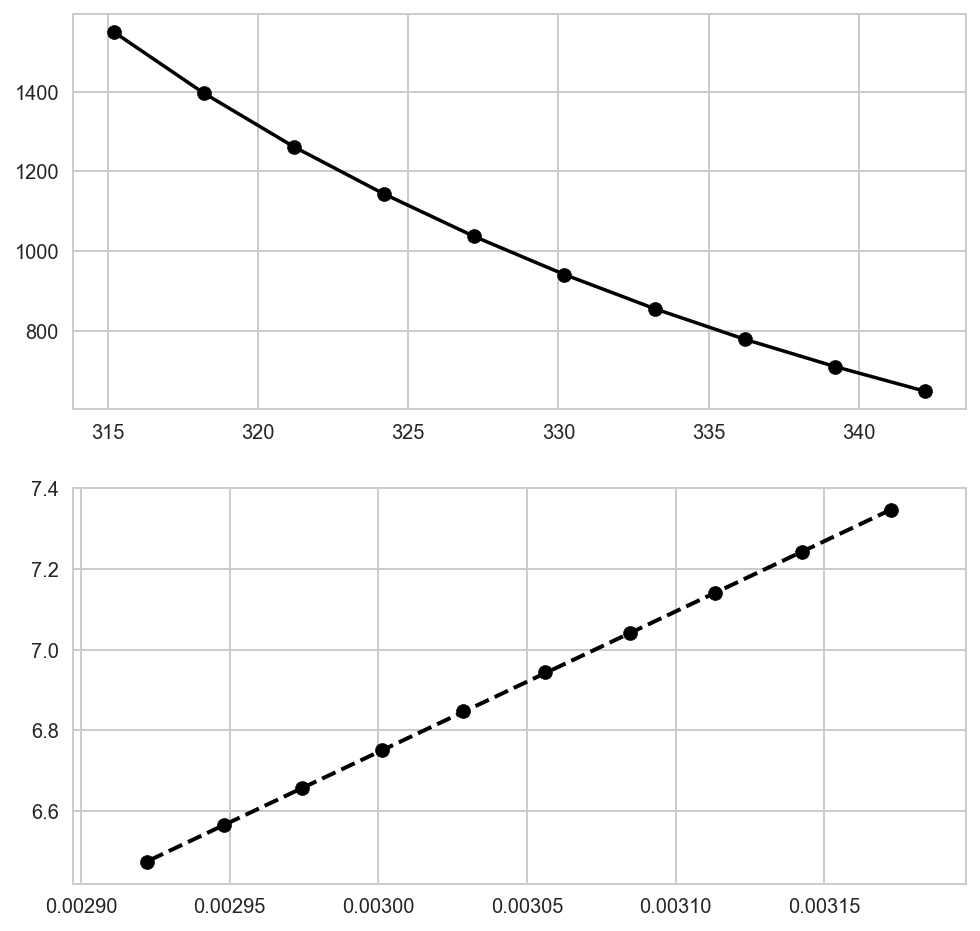

In [9]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 1550.0, 
    '_t_l' : make3(42.2), 
    '_U_l' : [0,-8.1,-16.7,-25.8,-35.6,-46.1,-57.3,-69.2,-81.7,-95.0]
}
s_bridge(**s_data)